In [2]:
import numpy as np

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

/home/hhchung/dyngraph-uda/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torch_geometric.utils import to_undirected
from torch_geometric.loader import DataLoader

In [4]:
from ogb.nodeproppred import PygNodePropPredDataset

In [5]:
from dataset import temp_partition_arxiv

In [1]:
import matplotlib.pyplot as plt

In [6]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name = dataset_name, root='/home/hhchung/data/ogb-data')

## Load Data ##

In [7]:
dataset = PygNodePropPredDataset(name = dataset_name, root='/home/hhchung/data/ogb-data')
data = dataset[0]
data.edge_index = to_undirected(data.edge_index, data.num_nodes) # mimicking barlow twins repo

## Data Partition ##

* Train: 0-2011
* Val: 2012
* Test:
** 2013-2014 (then adapt 2012-2013 adapt-val 2014)
** 2015-2016 (then adapt 2014-2015 adapt-val 2016)
** 2017-2018 (then adapt 2016-2017 adapt-val 2018)
** 2019-2020

## Source Training Stage ##

* Train: 0-2011
* Val: 2012

In [12]:
data_2012_2013 = temp_partition_arxiv(data, year_bound=[-1,2012,2013], proportion=1.0)

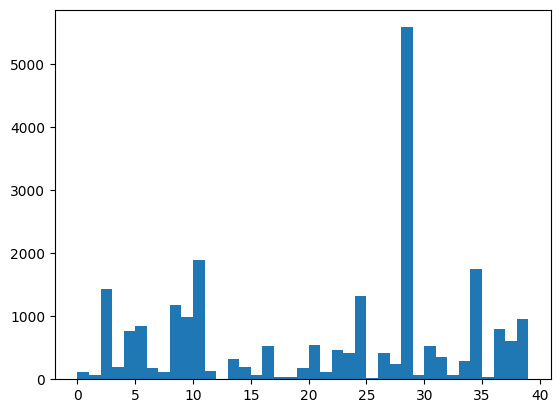

In [22]:
plt.hist(data_2012_2013.y.detach().numpy(), bins=list(range(40)))
plt.show()

## 2013-2014 ##

In [23]:
data_2013_2015 = temp_partition_arxiv(data, year_bound=[-1,2013,2015], proportion=1.0)

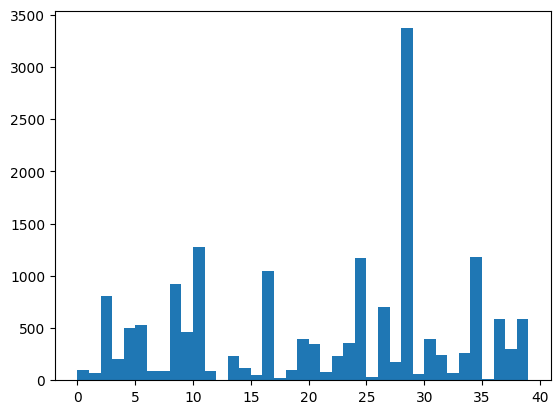

In [28]:
plt.hist(data_2013_2015.y[data_2013_2015.val_mask].detach().numpy(), bins=list(range(40)))
plt.show()

## 2015-2016 ##

In [26]:
data_2015_2017 = temp_partition_arxiv(data, year_bound=[-1,2015,2017], proportion=1.0)

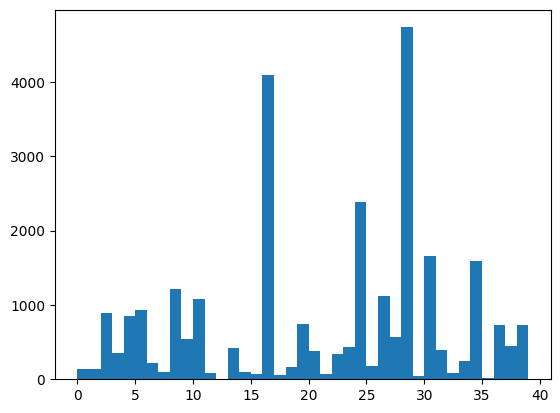

In [29]:
plt.hist(data_2015_2017.y[data_2015_2017.val_mask].detach().numpy(), bins=list(range(40)))
plt.show()

## 2017-2018 ##

In [30]:
data_2017_2019 = temp_partition_arxiv(data, year_bound=[-1,2017,2019], proportion=1.0)

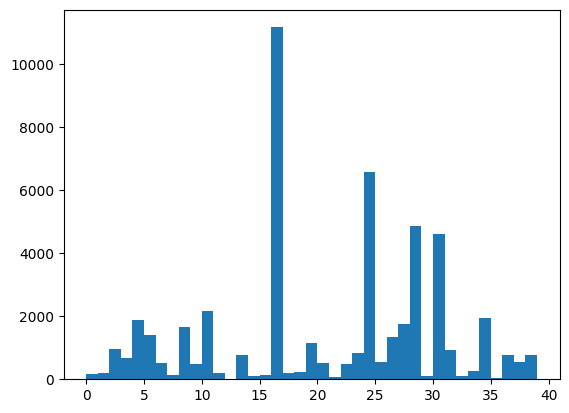

In [31]:
plt.hist(data_2017_2019.y[data_2017_2019.val_mask].detach().numpy(), bins=list(range(40)))
plt.show()

## 2019-2020 ##

In [32]:
data_2019_2021 = temp_partition_arxiv(data, year_bound=[-1,2019,2021], proportion=1.0)

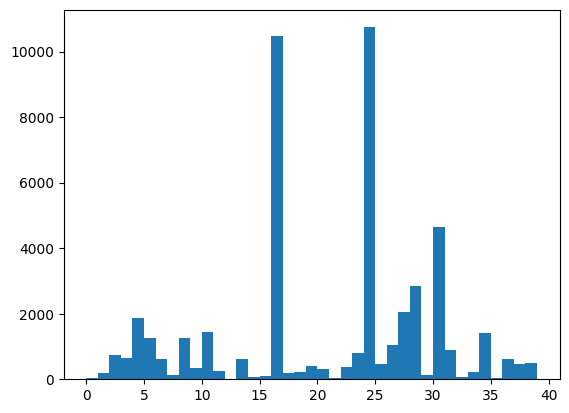

In [33]:
plt.hist(data_2019_2021.y[data_2019_2021.val_mask].detach().numpy(), bins=list(range(40)))
plt.show()

In [4]:
fix_acc_list = [0.5907802649083232, 0.5593853527877635, 0.549247672762046, 0.5533403287862889]
jan_acc_list = [0.5907802649083232, 0.559173891590893, 0.5075427880017954, 0.38612842828631977]
iwjan_oracle_acc_list = [0.5907802649083232, 0.4927398322407838, 0.4661306375753791, 0.4754644775013888]
dann_acc_list = [0.5907802649083232, 0.5434552759568619, 0.5088698503151773, 0.4955866921794951]
iwdann_oracle_acc_list = [0.5907802649083232, 0.49499541834073446, 0.4753029800355184, 0.3737835113058865]

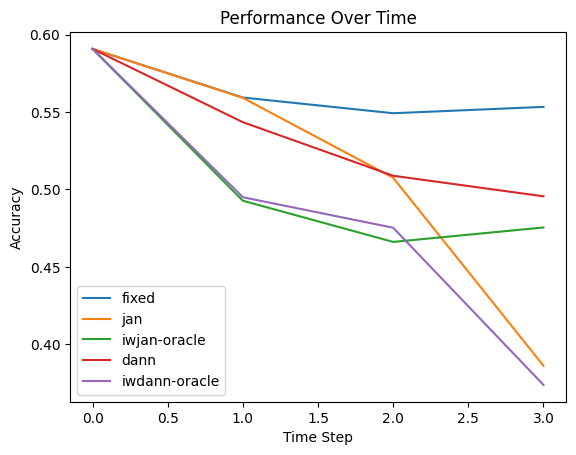

In [8]:
plt.plot(fix_acc_list, label='fixed')
plt.plot(jan_acc_list, label='jan')
plt.plot(iwjan_oracle_acc_list, label='iwjan-oracle')
plt.plot(dann_acc_list, label='dann')
plt.plot(iwdann_oracle_acc_list, label='iwdann-oracle')
plt.legend()
plt.title('Performance Over Time')
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.savefig('conditional_distribution_matching.png', dpi=400)
plt.show()

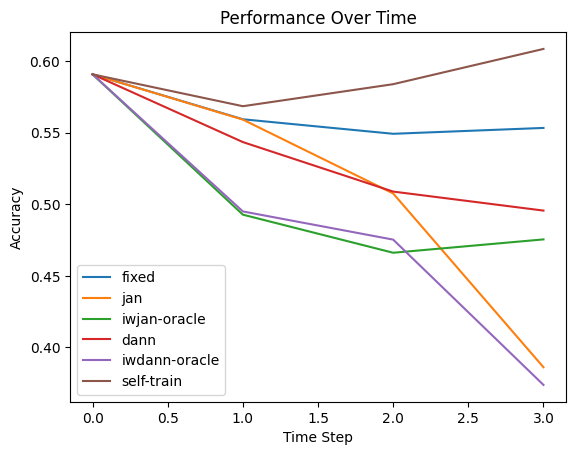

In [10]:
self_train_acc_list = [0.5907802649083232, 0.5685134277860012, 0.5839074178880194, 0.6085426825504598]
plt.plot(fix_acc_list, label='fixed')
plt.plot(jan_acc_list, label='jan')
plt.plot(iwjan_oracle_acc_list, label='iwjan-oracle')
plt.plot(dann_acc_list, label='dann')
plt.plot(iwdann_oracle_acc_list, label='iwdann-oracle')
plt.plot(self_train_acc_list, label='self-train')
plt.legend()
plt.title('Performance Over Time')
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.savefig('self_train.png', dpi=400)
plt.show()